## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# unique users in total
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# proportion of conversion
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# treatment group not receiving the new page
cond_1 = '(group == "treatment" and landing_page != "new_page")'

# control group not receiving the old page
cond_2 = '(group != "treatment" and landing_page == "new_page")'

# total
df.query(cond_1 + ' or ' + cond_2).shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# treatment group receiving the new page
cond_3 = '(group == "treatment" and landing_page == "new_page")'

# control group receiving the old page
cond_4 = '(group == "control" and landing_page == "old_page")'

# total
df2 = df.query(cond_3 + ' or ' + cond_4)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# unique users in total
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# repeated user
df2.user_id[df2.user_id.duplicated() == True]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# repeated user
df.iloc[2893]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 2893, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# drop repeated
df2 = df2.drop(2893)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# overall proportion of conversion
p_overall = df2.converted.mean()
p_overall

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# control group proportion of conversion
p_control = df2.query('group == "control"').converted.mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# treatment group proportion of conversion
p_treatment = df2.query('group == "treatment"').converted.mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# probability of new page
(df2.landing_page == "new_page").mean()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Answer**

Almost half of the users recevied the new page. 
Only 11.88 percent of them got converted. 
This is actually quite similar to the conversion rate of the people who received the old page (12.04 percent).
Because the conversion rates are so similar it seems that there is no evidence that one page is better than the other in terms of conversions. 

*End of answer*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is: do you stop as soon as one page is considered significantly better than another or do you continue for it to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider the case where you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

$$H_0: p_\text{old} \geq p_\text{new}$$
$$H_1: p_\text{old} < p_\text{new}$$

*End of answer*

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# new page conversion rate under null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# old page conversion rate under null
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
# number of new-page users
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
# number of old-page users
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# simulation
# n_new transactions with rate p_new (under null)
new_page_converted = np.random.choice(a=[0, 1], 
                                      p=[1-p_new, p_new], 
                                      size=n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# simulation
# n_old transactions with rate p_old (under null)
old_page_converted = np.random.choice(a=[0, 1], 
                                      p=[1-p_old, p_old], 
                                      size=n_old)

old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# sample proportion of new page conversion under null
p_new_sample = new_page_converted.mean()

# sample proportion of old page conversion under null
p_old_sample = old_page_converted.mean()

# difference
p_new_sample - p_old_sample

0.00021812729857900726

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [25]:
p_diffs = []

# simulation
# sampling distribution for sample proportion difference under null
for _ in range(int(1e4)):
    p_n_s = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new]).mean()
    p_o_s = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old]).mean()
    p_diffs.append(p_n_s - p_o_s)
    
# A much more implementation would be
# p_diffs = (np.random.binomial(n_new, p_new, 10000)/n_new 
#           - np.random.binomial(n_old, p_old, 10000)/n_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

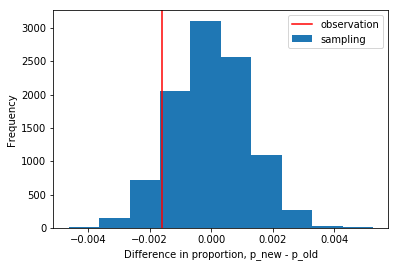

In [26]:
p_diffs = np.array(p_diffs)

# histogram
# sampling distribution for sample proportion difference under null
plt.hist(p_diffs, label='sampling')
plt.axvline(p_treatment-p_control, c='r', label='observation')
plt.xlabel('Difference in proportion, p_new - p_old')
plt.ylabel('Frequency')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
# p-value
(p_diffs > p_treatment - p_control).mean()

0.90190000000000003

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

In part **j** we calculated the probability under the null hypothesis of obtaining the observed statistic or one more extreme value in favor of the alternate hypothesis.  By definition, this is the p-value!  

We see that the p-vlaue is much larger than the allowed threshold of 0.05.  It is not at all unlikely to obtain the observed value under the null hypothesis 

$$H_0: p_\text{old} \geq p_\text{new}.$$

Therefore, we fail to reject the null hypothesis that the new page is no better than the old page in terms of conversion. 

*End of answer*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the cell below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

# old page conversions
convert_old = df2.query('group == "control"').converted.sum()

# new page conversions
convert_new = df2.query('group == "treatment"').converted.sum()

# old pages
n_old = df2.query('group == "control"').shape[0]

# new pages
n_new = df2.query('group == "treatment"').shape[0]

convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
# z test
z_score, p_value = sm.stats.proportions_ztest(
    count = [convert_old, convert_new], 
    nobs = [n_old, n_new], 
    alternative='smaller')

z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [30]:
from scipy.stats import norm

# significance of z-score
norm.cdf(z_score)

0.90505831275902449

In [31]:
# critical z-score at 95% confidence
norm.ppf(1-0.05)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

We see that the z-score is below the minimum acceptable score (at 95% confidence level) of 1.645, and similarly the p-value is much greater than the maximum acceptable value of 0.05.  We therefore fail to reject the null hypothesis that the new page is no better than the old page for conversion.  

*End of answer*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# add intercept
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [33]:
# dummy variables for landing page
df2[['ab_page', 'drop_it']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,drop_it
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [34]:
# drop the unnecessary dummy column
df2.drop('drop_it', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
# import the model
from statsmodels.api import Logit

# instantiate the model
model = Logit(df2['converted'], df2[['intercept', 'ab_page']])

# fit the model
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        05:35:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**

The p-value for ab_page is 0.190.  This is different from the value we found in **Part II.** We get two different p-values because the two tests are different.  

In the current test, the null hypothesis is that the new page makes no difference for conversion ($H_0: p_\text{old} = p_\text{new}$).  The alternative hypothesis is that the new page makes a difference ($H_1: p_\text{old} \neq p_\text{new}$), for better or for worse.   

In **Part II**, on the other hand, the null hypothesis was that the new page makes no positive difference compared to the old page ($H_0: p_\text{old} \geq p_\text{new}$).  The alternative hypothesis is that the new page is better ($H_1: p_\text{old} < p_\text{new}$).  

*End answer*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

While doing statistical investigations, there is always a chance of Simpson's paradox.  For example, from the above calculations we may conclude that the new page made no difference on conversion.  It may so happen that there is a confounding variable that makes this conclusion invalid.  For the country data below, for example (and I am writing this before I have done the analysis), it is possible that the conversion rate is low in a certin group of countries and most of the treatment group belonged to this group.  Then, it is possible that the conversion rate in each for the new page is higher even though the overall conversion rate is slightly lower (compared to the old page). 

Even if the situation is not this extreme, is cannot be concluded that users in different countries respond the same way to the new page.  We have to investigate.  

There are of course disadvantages as well.  We may have correlated variables and face collinearity or multicollinearity, which will affect the interpretability of the model. 

*End answer*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [37]:
# load country data
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# add country data to previous data
df2 = df2.join(df_countries.set_index('user_id'), on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [39]:
# unique country values
df2.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [40]:
# dummy variables for the country column
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [41]:
# instantiate the model
model_country = Logit(df2['converted'], 
                           df2[['intercept', 'CA', 'UK']])

# fit the model
results_country = model_country.fit()

# summary
results_country.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Jun 2018   Pseudo R-squ.:               1.521e-05
Time:                        05:35:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Interpretation**

It does not seem like the countries have significant impact on conversion.  A person in Canada is only 4 percent less likely to convert whereas a person in United Kingdom is about one percent more likely to convert.  This lack of significance is evident from p-values as well.  In each case (Canada and United Kingdom) the p-value is high enough that we cannot discard the possibility that the differences are purely due to chance. 

*End interpretation*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

**No interactions**

In [42]:
model_w_country = sm.Logit(df2['converted'], 
                           df2[['intercept', 'ab_page', 'CA', 'UK']])
results_w_country = model_w_country.fit()
results_w_country.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 Jun 2018   Pseudo R-squ.:               2.323e-05
Time:                        05:35:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**With interactions**

In [43]:
# treatment group in UK
df2['ab_page_and_UK'] = df2['ab_page']*df2['UK']

# treatment group in Canada
df2['ab_page_and_CA'] = df2['ab_page']*df2['CA']

df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,ab_page_and_UK,ab_page_and_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,0,1


In [44]:
# instantiate the model
model_w_int = Logit(df2['converted'], 
                           df2[['intercept', 'ab_page', 'CA', 'UK',
                               'ab_page_and_CA', 'ab_page_and_UK']])

# fit the model
results_w_int = model_w_int.fit()

# summary
results_w_int.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 15 Jun 2018   Pseudo R-squ.:               3.482e-05
Time:                        05:35:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page           -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA                -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK                -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page_and_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_page_and_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
==================================================================================
"""

**Interpretation**

It does not seem like the interactions have any effect.  Standard errors are high and so are the p-values.  This is on top of lost interpretability of the model due to interactions. 

*End interpretation*

<a id='conclusions'></a>
## Conclusions

We see that the new page did not have any statistical significance in terms of conversion.  In fact it was slightly worse, though the difference is not significant.  It also did not matter which country the user belongs to.  

On the face of it, the above analyses seem to be a strong case for the rejection of the new page.  Not necessarily.  Maybe the new page is part of a broader initiative to redesign the infrastructure.  Maybe it makes the webpage load much faster.  Maybe the new page is based on a new and relevant language, and is much more customizable.  If any of these is the case, one should perhaps switch to the new page.  After all, it was not statistically worse than the old page!


In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0